In [13]:
import requests
from datetime import datetime
import time

import json
import pandas as pd
import numpy as np

In [14]:
df=pd.read_csv("1.csv")

for x in range(2,4):
    print(len(df))
    df_tmp = pd.read_csv(str(x)+".csv")
    print(len(df_tmp))
    df=pd.concat([df, df_tmp],ignore_index = True)

print(len(df))

5027
20000
25027
20000
45027


In [15]:
df

,tx_hash,tx_time,output_address,fund_type,amount,token,risk_score,illicit,Sanctioned,match_element,...,score_change,predictive,comment,process_status,has_sent,has_received,workflow_status,analysis_meta,illicit_score,Sanctioned_score
0,7515f82ad14751c8c0476c0a8537ed48f153c61021e950...,2023-05-29T12:29:12Z,TWS1onJnNTg8tJHomceqxBxTsUB1DHh7PV,destination_of_funds,0.000000,TRX/tron,10.000000,0,0,Coin Swap Service,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.00000
1,429d07b129c54d3ad9c6ec058a1b1cba43120aa371f7a4...,2023-05-29T12:29:57Z,TNp1vPy3W9PB4Y7kcMBaqG3BM9BtWpZwHh,destination_of_funds,1.139090,TRX/tron,10.000000,0,0,Coin Swap Service,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.00000
2,c119235e18f8bbc3c8afdf4d6944049ae0dd7458d60270...,2023-05-29T12:30:51Z,TCet5Cfjr2gR6MFBFxW9QA3QBCHHYtsHFL,destination_of_funds,0.000000,TRX/tron,9.999343,0,0,Coin Swap Service,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.00000
3,db4abda03946e808ff1c020f4056732b549b48f8f61985...,2023-05-29T12:30:42Z,TRLk6PBEPaB2cVgivMtJ4cwj5KPVH7vw5b,destination_of_funds,0.000000,TRX/tron,10.000000,0,0,Coin Swap Service,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.00000
4,26be24ead3a4dd70ea0d65068de2699d66c601a3684e2d...,2023-05-29T12:28:30Z,TWS1onJnNTg8tJHomceqxBxTsUB1DHh7PV,destination_of_funds,25.074912,USDT/tron,10.000000,0,0,Coin Swap Service,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45022,ac9f80b410448218f3c81d5e467bf83ed4e20e0c862eb0...,NaN,NaN,NaN,0.000000,NaN,NaN,0,0,NaN,...,0.0,NaN,InvalidTxOutput,NaN,NaN,NaN,NaN,NaN,0.0,0.00000
45023,ac9f80b410448218f3c81d5e467bf83ed4e20e0c862eb0...,2023-05-25T03:57:00Z,TCJZqCUXL53SrbKFJmtwiKgQMHZKJdZXEN,destination_of_funds,0.425570,TRX/tron,0.024060,0,1,Exchange,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.02406
45024,724fedf858b71a7b11c23e5507d2f3a3117d45bbbbb096...,NaN,NaN,NaN,0.000000,NaN,NaN,0,0,NaN,...,0.0,NaN,InvalidTxOutput,NaN,NaN,NaN,NaN,NaN,0.0,0.00000
45025,724fedf858b71a7b11c23e5507d2f3a3117d45bbbbb096...,NaN,NaN,NaN,0.000000,NaN,NaN,0,0,NaN,...,0.0,NaN,InvalidTxOutput,NaN,NaN,NaN,NaN,NaN,0.0,0.00000


In [100]:
df.to_csv('elliptic_raw.csv', index=False)  

In [17]:
df['comment'].value_counts()

InvalidTxOutput    22722
NotInBlockchain     2409
ServerError           12
Name: comment, dtype: int64

In [18]:
df[ (df['comment'].isin(['InvalidTxOutput', 'NotInBlockchain','ServerError']))]  #invalid record

,tx_hash,tx_time,output_address,fund_type,amount,token,risk_score,illicit,Sanctioned,match_element,...,score_change,predictive,comment,process_status,has_sent,has_received,workflow_status,analysis_meta,illicit_score,Sanctioned_score
5027,586602a50212627f7c00200e2a9f578dce0f810836fce4...,NaN,NaN,NaN,0.0,NaN,NaN,0,0,NaN,...,0.0,NaN,InvalidTxOutput,NaN,NaN,NaN,NaN,NaN,0.0,0.0
5029,93ec6bab39cdf7db51bb2d954fc81390aca29466131164...,NaN,NaN,NaN,0.0,NaN,NaN,0,0,NaN,...,0.0,NaN,InvalidTxOutput,NaN,NaN,NaN,NaN,NaN,0.0,0.0
5031,c860844213bf6e4dca94cf2b1d8b4e55b10e3761237aee...,NaN,NaN,NaN,0.0,NaN,NaN,0,0,NaN,...,0.0,NaN,InvalidTxOutput,NaN,NaN,NaN,NaN,NaN,0.0,0.0
5033,874b7c2b31a551349206ab08d04e77e425ab1510e80750...,NaN,NaN,NaN,0.0,NaN,NaN,0,0,NaN,...,0.0,NaN,InvalidTxOutput,NaN,NaN,NaN,NaN,NaN,0.0,0.0
5035,5d7ffaf5a44da7bc8101796798e4d0ef1681c1494e278a...,NaN,NaN,NaN,0.0,NaN,NaN,0,0,NaN,...,0.0,NaN,InvalidTxOutput,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45020,e89f132168797f0e525b2a636916a8e6f78215da87b6fb...,NaN,NaN,NaN,0.0,NaN,NaN,0,0,NaN,...,0.0,NaN,InvalidTxOutput,NaN,NaN,NaN,NaN,NaN,0.0,0.0
45022,ac9f80b410448218f3c81d5e467bf83ed4e20e0c862eb0...,NaN,NaN,NaN,0.0,NaN,NaN,0,0,NaN,...,0.0,NaN,InvalidTxOutput,NaN,NaN,NaN,NaN,NaN,0.0,0.0
45024,724fedf858b71a7b11c23e5507d2f3a3117d45bbbbb096...,NaN,NaN,NaN,0.0,NaN,NaN,0,0,NaN,...,0.0,NaN,InvalidTxOutput,NaN,NaN,NaN,NaN,NaN,0.0,0.0
45025,724fedf858b71a7b11c23e5507d2f3a3117d45bbbbb096...,NaN,NaN,NaN,0.0,NaN,NaN,0,0,NaN,...,0.0,NaN,InvalidTxOutput,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [19]:
df_valid=df[ (~df['comment'].isin(['InvalidTxOutput', 'NotInBlockchain','ServerError']))].reset_index(drop=True)  # valid record
df_valid

,tx_hash,tx_time,output_address,fund_type,amount,token,risk_score,illicit,Sanctioned,match_element,...,score_change,predictive,comment,process_status,has_sent,has_received,workflow_status,analysis_meta,illicit_score,Sanctioned_score
0,7515f82ad14751c8c0476c0a8537ed48f153c61021e950...,2023-05-29T12:29:12Z,TWS1onJnNTg8tJHomceqxBxTsUB1DHh7PV,destination_of_funds,0.000000,TRX/tron,10.000000,0,0,Coin Swap Service,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.00000
1,429d07b129c54d3ad9c6ec058a1b1cba43120aa371f7a4...,2023-05-29T12:29:57Z,TNp1vPy3W9PB4Y7kcMBaqG3BM9BtWpZwHh,destination_of_funds,1.139090,TRX/tron,10.000000,0,0,Coin Swap Service,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.00000
2,c119235e18f8bbc3c8afdf4d6944049ae0dd7458d60270...,2023-05-29T12:30:51Z,TCet5Cfjr2gR6MFBFxW9QA3QBCHHYtsHFL,destination_of_funds,0.000000,TRX/tron,9.999343,0,0,Coin Swap Service,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.00000
3,db4abda03946e808ff1c020f4056732b549b48f8f61985...,2023-05-29T12:30:42Z,TRLk6PBEPaB2cVgivMtJ4cwj5KPVH7vw5b,destination_of_funds,0.000000,TRX/tron,10.000000,0,0,Coin Swap Service,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.00000
4,26be24ead3a4dd70ea0d65068de2699d66c601a3684e2d...,2023-05-29T12:28:30Z,TWS1onJnNTg8tJHomceqxBxTsUB1DHh7PV,destination_of_funds,25.074912,USDT/tron,10.000000,0,0,Coin Swap Service,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19879,84a94d05ac98082c9e585414657ce5969f5f7de4ffba6d...,2023-05-25T03:57:03Z,TTDqZxXEvSMRhVLxe7eTqoaVkCWzkKcctP,destination_of_funds,0.000000,TRX/tron,0.000000,0,0,NaN,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.00000
19880,8b2b9eae84e7c891f5f2f0aef094f2705d5939336b1758...,2023-05-25T03:57:03Z,TLuCECe4MnDPYekqjfyzcftAvdrhn9Ph3B,destination_of_funds,999.899603,USDT/tron,0.089001,0,0,Coin Swap Service+Gambling,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.00000
19881,de4a06494ce8f946182a624272db8f195995f13d60bec8...,2023-05-25T03:57:03Z,TW2zHcnwAjaVMj7esrHoJEH4g7YvX5t8SV,destination_of_funds,4.630032,TRX/tron,0.001560,0,0,Coin Swap Service,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.00000
19882,e89f132168797f0e525b2a636916a8e6f78215da87b6fb...,2023-05-25T03:57:00Z,TXLyfooycvmpBgULzpSruusX7z8iYZnnCh,destination_of_funds,0.000000,TRX/tron,0.000000,0,0,NaN,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.00000


In [98]:
df_sort=df_valid.sort_values(by=['risk_score'])
df_valid_unqHash=df_sort.drop_duplicates( subset="tx_hash", keep="last")
df_valid_unqHash.describe().T 

,count,mean,std,min,25%,50%,75%,max
amount,19808.0,1134.010841,17521.500161,0.000000,0.0,0.0,2.342764,2.000385e+06
risk_score,19808.0,0.164201,1.033138,0.000000,0.0,0.0,0.004774,1.000000e+01
illicit,19808.0,0.097132,0.296146,0.000000,0.0,0.0,0.000000,1.000000e+00
Sanctioned,19808.0,0.193609,0.395136,0.000000,0.0,0.0,0.000000,1.000000e+00
major_per,19808.0,1.591901,10.281834,0.000000,0.0,0.0,0.037309,1.000000e+02
score_change,19808.0,0.000378,0.065842,-4.374542,0.0,0.0,0.000000,3.736362e+00
analysis_meta,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
illicit_score,19808.0,0.003945,0.141050,0.000000,0.0,0.0,0.000000,1.000000e+01
Sanctioned_score,19808.0,0.059190,0.585985,0.000000,0.0,0.0,0.000000,1.000000e+01


In [48]:
df_valid_unqHash.reset_index(drop=True)

,tx_hash,tx_time,output_address,fund_type,amount,token,risk_score,illicit,Sanctioned,match_element,...,score_change,predictive,comment,process_status,has_sent,has_received,workflow_status,analysis_meta,illicit_score,Sanctioned_score
0,1d48aec9e4d099901ccf39527ff568b7b27dda9f799203...,2023-05-24T00:54:09Z,TA99Z2unfZ1WkCajuZDxMNra6ycC3eJ2fy,destination_of_funds,0.000000,USDT/tron,0.0,0,0,NaN,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.0
1,1c66e8b0559550d3009230a979c836084fc797f8f28d68...,2023-05-24T03:32:15Z,TChXH7C9JxdSwnHcTXTZxXghpyksjirbcx,destination_of_funds,0.150322,TRX/tron,0.0,0,0,NaN,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.0
2,34b7a9d611d67d3bcbf4569a77af0271b026f3054ae7a0...,2023-05-24T03:34:45Z,TRvZbzdYXfycG6TXAXv7emQfU6rqF8KohS,destination_of_funds,0.567938,USDT/tron,0.0,0,0,NaN,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.0
3,d1feee6c59720d763c25bdba72ea918266c667eeacc76f...,2023-05-24T03:33:18Z,TRvZbzdYXfycG6TXAXv7emQfU6rqF8KohS,destination_of_funds,0.000000,TRX/tron,0.0,0,0,NaN,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.0
4,673f3fdd152785cb4ffef9d486979b210cc3a8a9ba7cc9...,2023-05-24T03:34:33Z,TJUukXy1NDPxgg8cAnufsvueLQBwrPwYaC,destination_of_funds,0.000000,TRX/tron,0.0,0,0,NaN,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19803,bf15e09df4759569807fae1f7740a211bd0606f23918d0...,2023-05-23T14:57:39Z,TBestrnM3NbVSJPKALxbfV5d6jpoCw98hy,destination_of_funds,0.000000,TRX/tron,10.0,0,1,Exchange,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,10.0
19804,bb171ff5dce97ef3528c82dd700ef19c7c84b3bdf44685...,2023-05-24T06:32:12Z,TFYtRtPS55RoriU1piJvnbqwD1j731ywaF,destination_of_funds,1.558182,TRX/tron,10.0,0,0,Coin Swap Service,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.0
19805,1c1c5062f2b1cf0950dcee0a1dfe0b690f531ae15e7a19...,2023-05-24T06:32:09Z,TFYtRtPS55RoriU1piJvnbqwD1j731ywaF,destination_of_funds,2000.386282,USDT/tron,10.0,0,0,Coin Swap Service,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.0
19806,9a9c5ba7d5c314befd5527c09d6f178e8ac600e7859447...,2023-05-23T14:57:12Z,TTjpU9CkB1NNYTywiRexZquDqpsBi8isA4,destination_of_funds,0.000000,TRX/tron,10.0,0,0,Coin Swap Service,...,0.0,False,NaN,complete,True,True,active,NaN,0.0,0.0


In [99]:
df_valid_unqHash.to_csv('elliptic_valid_data.csv', index=False)

In [45]:
df_valid_unqHash.tx_hash.nunique()

19808

In [49]:
df_valid_unqHash['fund_type'].value_counts()

destination_of_funds    19801
source_of_funds             7
Name: fund_type, dtype: int64

In [50]:
df_valid_unqHash['token'].value_counts()

TRX/tron     13418
USDT/tron     6378
USDC/tron        6
TUSD/tron        3
USDD/tron        3
Name: token, dtype: int64

In [51]:
df_valid_unqHash['tx_hash'].value_counts()

1d48aec9e4d099901ccf39527ff568b7b27dda9f79920347872c998294b414cc    1
72eab9d97c2cfff2c2808636ad1ea971816df978d9aa23a103d42d36c6d5aa50    1
a003836cda023b224c9fcf8b8494a9fd9fa79743456e89199588a7503cb76bc2    1
f8d6620cc32bd08c08c161ded62b4227e871bb3f8f03f7d63a1cc89178573eeb    1
a13f5c23bd0fecfc8ac59f5e3834a194cd1a8464ac3a1a347196e81015af74cb    1
                                                                   ..
4dd6fe08a8a433825dc6b57657348beaef32587658d5d7e265ff1440de4b3e88    1
a9c570415212226725b49d01080218f474dcede480a5e85b9a3ee237c4635234    1
9e6dabaa89a11c32cd7053df58c77d103208cd2c3139db4bff2744c3a8cf6052    1
b50af4b0d76b563ffa394659dce0466037e947b62f0c7a4efcbce7531eb1704f    1
7515f82ad14751c8c0476c0a8537ed48f153c61021e9500d50ecb6fb7fdc3362    1
Name: tx_hash, Length: 19808, dtype: int64

In [52]:
df_valid_unqHash['Sanctioned'].value_counts()

0    15973
1     3835
Name: Sanctioned, dtype: int64

In [53]:
df_valid_unqHash['risk_score'].value_counts()

0.000000     12044
10.000000      168
0.002510       129
0.397455       110
0.003731        34
             ...  
0.004407         1
0.004405         1
0.004405         1
0.004401         1
0.008876         1
Name: risk_score, Length: 5973, dtype: int64

In [84]:
df_valid_unqHash['illicit'].value_counts()

0    17884
1     1924
Name: illicit, dtype: int64

In [95]:
len(df_valid_unqHash[(df_valid_unqHash.risk_score > 5)])

223

In [96]:
len(df_valid_unqHash[(df_valid_unqHash.risk_score ==0)])

12044

(-0.1, 1.0]    19341
(1.0, 2.0]       179
(2.0, 4.0]       121
(4.0, 5.0]        18
(5.0, 6.0]        17
(6.0, 7.0]        12
(7.0, 8.0]         8
(8.0, 9.0]         6
(9.0, 10.0]      182
Name: risk_score, dtype: int64


<AxesSubplot:>

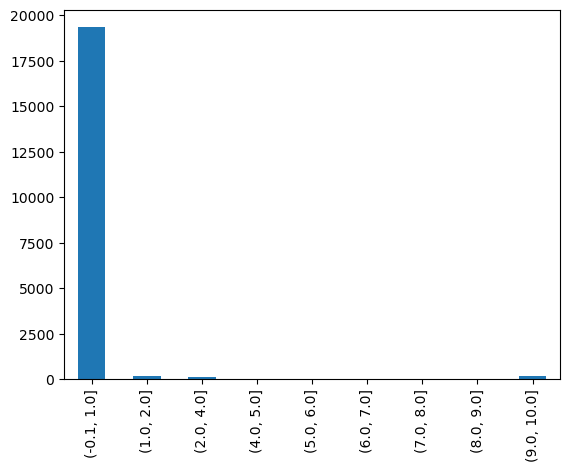

In [90]:
risk_score_interval=pd.cut(df_valid['risk_score'],[-0.1,1,2,4,5,6,7,8,9,10])
print(risk_score_interval.value_counts(sort = False))
risk_score_interval.value_counts(sort = False).plot.bar()



(-0.1, 1.0]    19869
(1.0, 2.0]        10
(2.0, 4.0]         1
(4.0, 5.0]         0
(5.0, 6.0]         0
(6.0, 7.0]         0
(7.0, 8.0]         0
(8.0, 9.0]         1
(9.0, 10.0]        3
Name: illicit_score, dtype: int64


<AxesSubplot:>

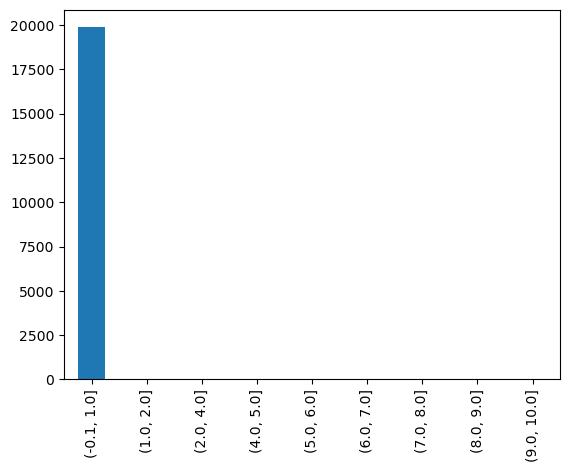

In [86]:
illicit_score_interval=pd.cut(df_valid['illicit_score'],[-0.1,1,2,4,5,6,7,8,9,10])
print(illicit_score_interval.value_counts(sort = False))
illicit_score_interval.value_counts(sort = False).plot.bar()


(-0.1, 1.0]    19884
(1.0, 2.0]         0
(2.0, 4.0]         0
(4.0, 5.0]         0
(5.0, 6.0]         0
(6.0, 7.0]         0
(7.0, 8.0]         0
(8.0, 9.0]         0
(9.0, 10.0]        0
Name: Sanctioned, dtype: int64


<AxesSubplot:>

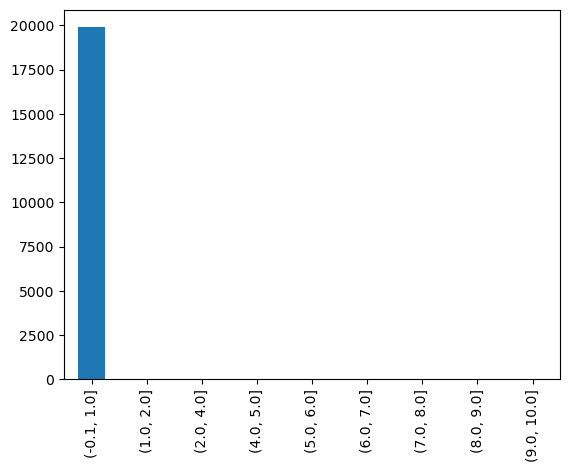

In [87]:
Sanctioned_score_interval=pd.cut(df_valid['Sanctioned'],[-0.1,1,2,4,5,6,7,8,9,10])
print(Sanctioned_score_interval.value_counts(sort = False))
Sanctioned_score_interval.value_counts(sort = False).plot.bar()

In [62]:
df_valid_unqHash.corr().loc['Sanctioned','illicit'] # correaltion of Sanctioned ,illicit

0.09470182845721653

In [85]:
df_valid_unqHash.corr().loc['illicit_score','Sanctioned_score'] # correaltion of Sanctioned score,illicit score

-0.0008181716413934442